# Object Detection Demo
Welcome to the object detection inference walkthrough!  This notebook will walk you step by step through the process of using a pre-trained model to detect objects in an image. Make sure to follow the [installation instructions](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/installation.md) before you start.

# Imports

In [21]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import time
import tarfile
import tensorflow as tf
print tf.__file__ ###
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

/home/censhusheng/.local/lib/python2.7/site-packages/tensorflow/__init__.pyc


## Env setup

In [2]:
# This is needed to display the images.
%matplotlib inline

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

## Object detection imports
Here are the imports from the object detection module.

In [3]:
from utils import label_map_util

from utils import visualization_utils as vis_util

## Load a (frozen) Tensorflow model into memory.

In [5]:
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/world/data-c9/censhusheng/train_tf_text_loc/inference_graph.pb'

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [6]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('data', 'pascal_label_map.pbtxt')
NUM_CLASSES = 20

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

## Helper code

In [10]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    if im_width%32 != 0:
        im_width += 32 - im_width%32
    if im_height%32 != 0:
        im_height += 32 - im_height%32
    image = image.resize((im_width, im_height))
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Detection

In [23]:
TEST_IMAGE_PATHS = [
    '/world/data-c7/censhusheng/data/MSRA-TD500/test/IMG_0059.JPG',
    '/world/data-c7/censhusheng/data/MSRA-TD500/test/IMG_0080.JPG',
    '/world/data-c7/censhusheng/data/MSRA-TD500/train/IMG_0030.JPG',
    '/world/data-c7/censhusheng/data/MSRA-TD500/train/IMG_0063.JPG',
]

# Size, in inches, of the output images.
IMAGE_SIZE = (20, 16)

('time', 1.5112271308898926)
[ 100.]


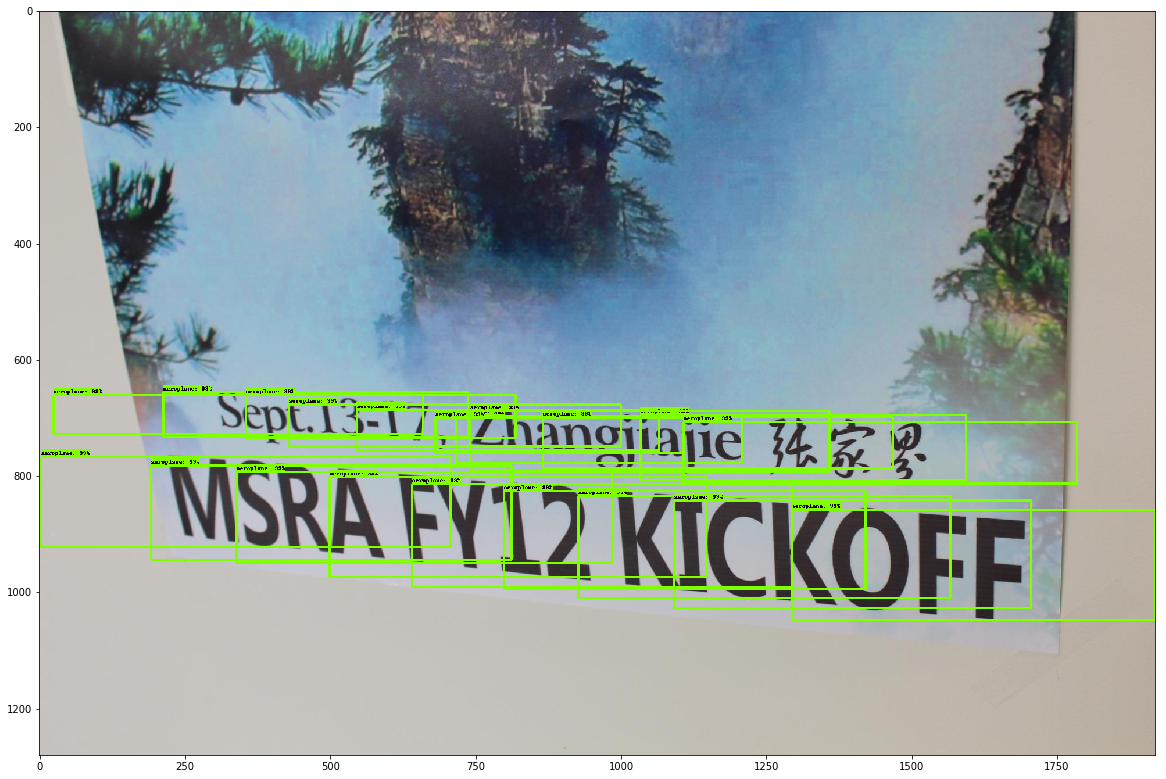

('time', 1.0696401596069336)
[ 100.]


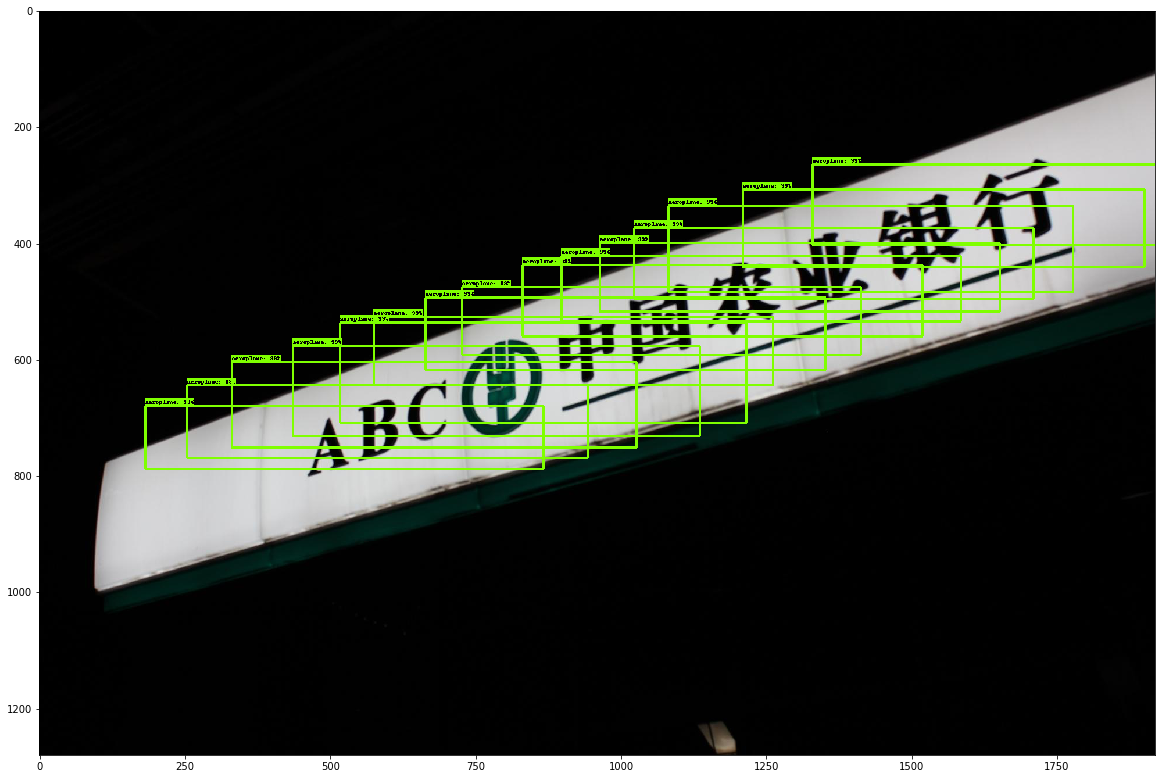

('time', 0.333690881729126)
[ 100.]


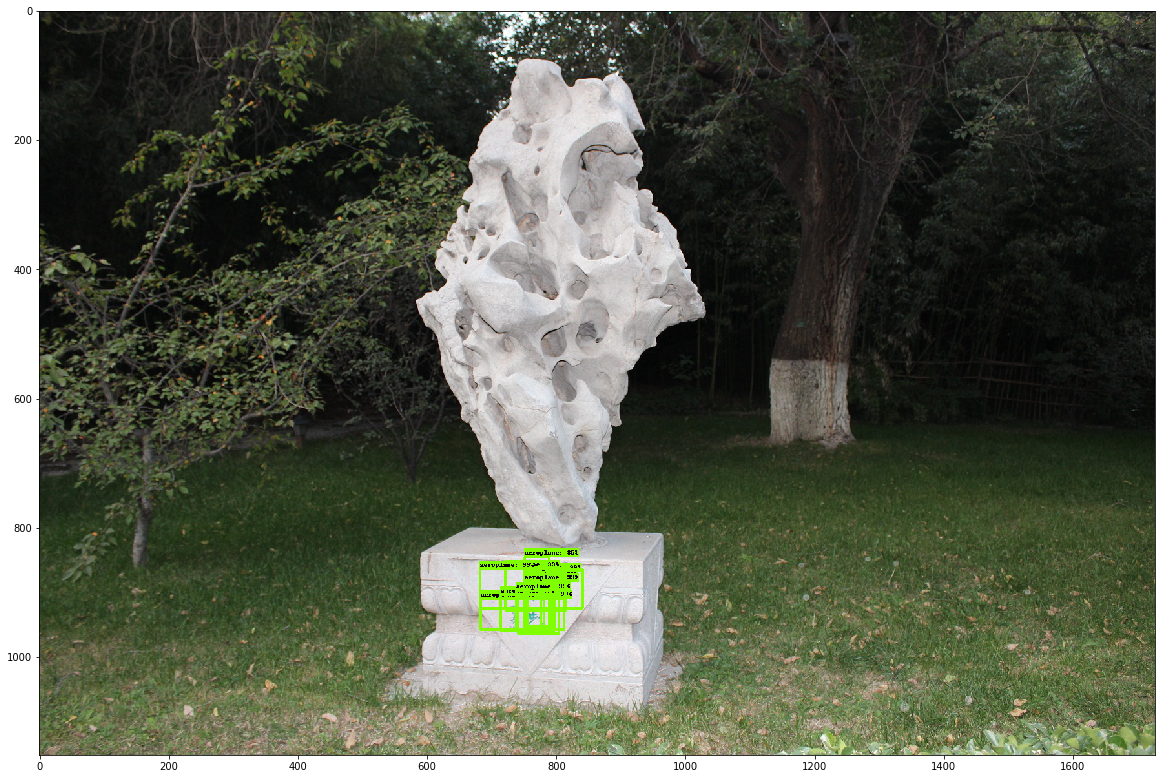

('time', 0.5042378902435303)
[ 100.]


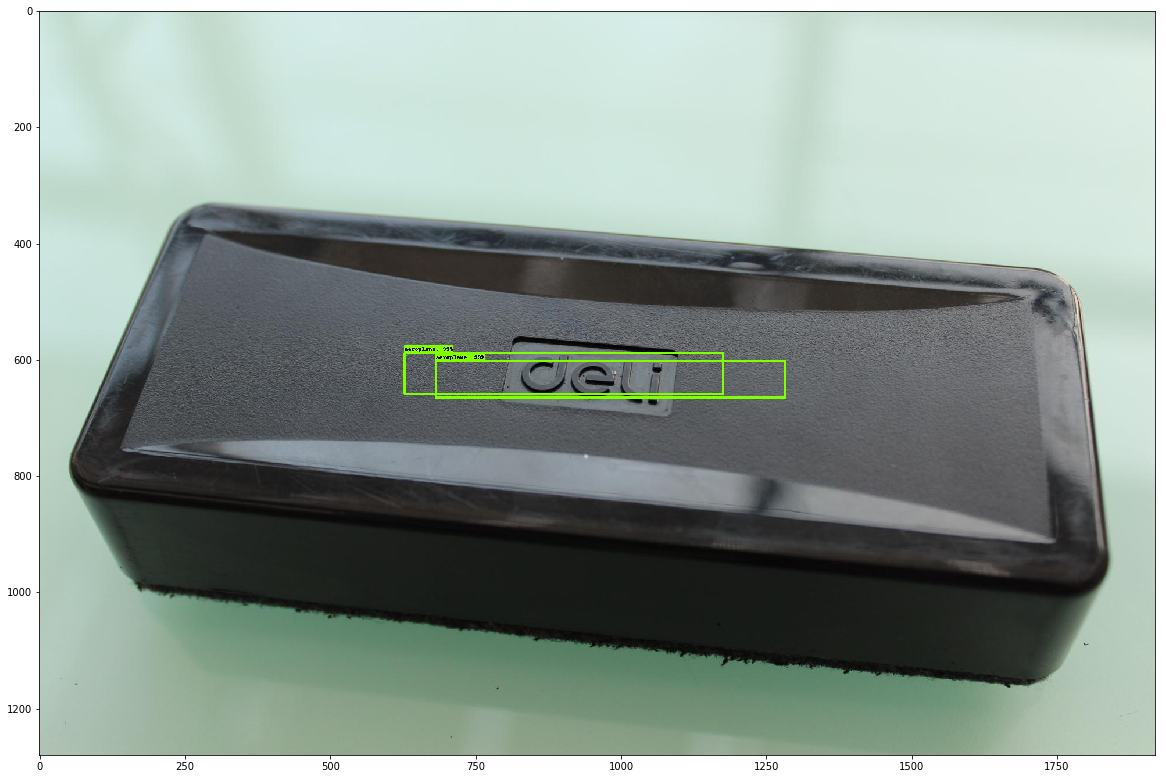

In [25]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
      # Each box represents a part of the image where a particular object was detected.
      boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
      # Each score represent how level of confidence for each of the objects.
      # Score is shown on the result image, together with the class label.
      scores = detection_graph.get_tensor_by_name('detection_scores:0')
      classes = detection_graph.get_tensor_by_name('detection_classes:0')
      num_detections = detection_graph.get_tensor_by_name('num_detections:0')
      # Actual detection.
      t0 = time.time()
      (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      print('time', time.time() - t0) ###
      print(num_detections) ###

      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=False,
          line_thickness=4)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)
      plt.show()